## Load Libraries

In [13]:
!sudo pip uninstall spacy -y

Found existing installation: spacy 2.1.3
Uninstalling spacy-2.1.3:
  Successfully uninstalled spacy-2.1.3


In [14]:
!sudo pip install --ignore-installed shapash

     |████████████████████████████████| 835 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 13.1 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 60.2 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 326 kB 106.2 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 81.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.0 MB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 62.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 642 kB 52.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 188 kB 105.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.1 

  Created wheel for dash-bootstrap-components: filename=dash_bootstrap_components-0.9.1-py3-none-any.whl size=170749 sha256=0d2becc4708f643bb43ec1928b9e11329c33981116f22862a3ac5bba84f609b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1v53455/wheels/20/1b/33/d2e69fdaa86adff4106d1456ab3e226bf6775e9b2d3465b558
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669703 sha256=96c3f072ec24bc986fc84dd4ec1b75b6baf1e486c0bdebed9daec2d1362e4707
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1v53455/wheels/0d/86/e6/1301ad34bbc93de0e1e582fb233bb16c2603601a9d1d4aa720
  Created wheel for dash-core-components: filename=dash_core_components-1.13.0-py3-none-any.whl size=3513141 sha256=36f138b6410e6c8c875de1b14c7ced086fa9e56adee7d086a2ed0a81c589f064
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1v53455/wheels/2b/97/20/c04f6d90637b8ac052a8548578edb0ca0c0890672907b8854c
  Created wheel for dash-html-components: filename=dash_html_components-1.1.1-py3-none-any.whl si

In [17]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer() # optional parameter

In [18]:
xpl.compile(
    x=Xtest,
    model=regressor,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
    y_pred=y_pred, # Optional
    postprocessing=postprocess # Optional: see tutorial postprocessing
)

NameError: name 'Xtest' is not defined

In [1]:
#util
import time  #some of the routines take a while, so we monitor the time
import os  #needed to use Environment Variables in Domino

In [2]:
#math
import pandas as pd  #for manipulating data
import numpy as np  #for manipulating data

In [3]:
#modeling
import sklearn  #for building models
import xgboost as xgb  #for building models
import sklearn.ensemble  #for building models
from sklearn.model_selection import train_test_split  #for creating a hold-out sample

In [4]:
#explainability
import lime  #LIME package
from lime import lime_tabular  #the type of LIME analysis we’ll do
import shap  #SHAP package

In [5]:
#viz
import matplotlib.pyplot as plt  #for custom graphs at the end
import seaborn as sns  #for custom graphs at the end

In [6]:
print(shap.__version__)
print(xgb.__version__)
print(sklearn.__version__)

0.28.5
0.82
0.20.3


In [7]:
pip show lime | grep Version

Version: 0.1.1.34
Note: you may need to restart the kernel to use updated packages.


## Load and Explore Boston Housing Data

We are trying to predict median value of owner-occupied homes in $1000s. The data comes from sklearn, so we can get more details about the columns from there.

In [8]:
X,y = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [10]:
pd.Series(y).head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [11]:
print(sklearn.datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Build the models

XGBoost

In [12]:
xgb_model = xgb.train({'objective':'reg:linear'}, xgb.DMatrix(X_train, label=y_train))

GBT from scikit-learn

In [13]:
sk_xgb = sklearn.ensemble.GradientBoostingRegressor()
sk_xgb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Random Forest

In [14]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

K Nearest Neighbor

In [15]:
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

## Create the SHAP Explainers

SHAP has the following explainers: deep, gradient, kernel, linear, tree, sampling

Tree on XGBoost

In [16]:
explainerXGB = shap.TreeExplainer(xgb_model)
shap_values_XGB_test = explainerXGB.shap_values(X_test)
shap_values_XGB_train = explainerXGB.shap_values(X_train)

Tree on Scikit GBT

In [17]:
explainerSKGBT = shap.TreeExplainer(sk_xgb)
shap_values_SKGBT_test = explainerSKGBT.shap_values(X_test)
shap_values_SKGBT_train = explainerSKGBT.shap_values(X_train)

Tree on Random Forest

In [18]:
explainerRF = shap.TreeExplainer(rf)
shap_values_RF_test = explainerRF.shap_values(X_test)
shap_values_RF_train = explainerRF.shap_values(X_train)

Must use Kernel method on KNN

Summarizing the data with k-Means is a way to speed up the processing

In [19]:
"""
Rather than use the whole training set to estimate expected values, we summarize with
a set of weighted kmeans, each weighted by the number of points they represent.
Running without the kmeans took 1 hr 6 mins 7 sec. 
Running with the kmeans took 2 min 47 sec.
Boston Housing is a very small dataset.
Running SHAP on models that require Kernel method and have a good amount of data becomes prohibitive. 
"""
X_train_summary = shap.kmeans(X_train, 10)

In [20]:
# # using kmeans
# t0 = time.time()
# explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)
# shap_values_KNN_test = explainerKNN.shap_values(X_test)
# shap_values_KNN_train = explainerKNN.shap_values(X_train)
# t1 = time.time()
# timeit=t1-t0
# timeit

In [21]:
# without kmeans a test run took 3967.6232330799103 seconds
"""
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
shap_values_KNN_train = explainerKNN.shap_values(X_train)
t1 = time.time()
timeit=t1-t0
timeit 
"""

'\nt0 = time.time()\nexplainerKNN = shap.KernelExplainer(knn.predict, X_train)\nshap_values_KNN_test = explainerKNN.shap_values(X_test)\nshap_values_KNN_train = explainerKNN.shap_values(X_train)\nt1 = time.time()\ntimeit=t1-t0\ntimeit \n'

#### Get the SHAP values into dataframes so we can use them later on

In [22]:
# XGBoost
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train.columns.values)
# Scikit GBT
df_shap_SKGBT_test = pd.DataFrame(shap_values_SKGBT_test, columns=X_test.columns.values)
df_shap_SKGBT_train = pd.DataFrame(shap_values_SKGBT_train, columns=X_train.columns.values)
# Random Forest
df_shap_RF_test = pd.DataFrame(shap_values_RF_test, columns=X_test.columns.values)
df_shap_RF_train = pd.DataFrame(shap_values_RF_train, columns=X_train.columns.values)

In [23]:
# # KNN
# df_shap_KNN_test = pd.DataFrame(shap_values_KNN_test, columns=X_test.columns.values)
# df_shap_KNN_train = pd.DataFrame(shap_values_KNN_train, columns=X_train.columns.values)

## Create the LIME Explainer

In [24]:
# if a feature has 10 or less unique values then treat it as categorical
categorical_features = np.argwhere(np.array([len(set(X_train.values[:,x])) 
                                             for x in range(X_train.values.shape[1])]) <= 10).flatten()

In [25]:
# LIME has one explainer for all models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X_train.columns.values.tolist(), 
                                                   class_names=['price'], 
                                                   categorical_features=categorical_features, 
                                                   verbose=True, 
                                                   mode='regression')

## Explaining an Instance (local interpretability)

Pick an instance to explain

In [26]:
j = np.random.randint(0, X_test.shape[0])

In [27]:
# optional, set j manually
j = 0

In [28]:
# initialize js
shap.initjs()

### XGBoost

#### SHAP

In [29]:
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], X_test.iloc[[j]])

#### LIME

Out-of-the-box LIME cannot handle the requirement of XGBoost to use xgb.DMatrix() on the input data

In [30]:
# the predict function input doesn't jive wtih LIME
xgb_model.predict(xgb.DMatrix(X_test.iloc[[j]]))

array([22.919056], dtype=float32)

In [31]:
# this will throw an error
"""
expXGB = explainer.explain_instance(X_test.values[j], xgb_model.predict, num_features=5)
expXGB.show_in_notebook(show_table=True)
"""

'\nexpXGB = explainer.explain_instance(X_test.values[j], xgb_model.predict, num_features=5)\nexpXGB.show_in_notebook(show_table=True)\n'

### Scikit-learn GBT

#### SHAP

In [32]:
shap.force_plot(explainerSKGBT.expected_value, shap_values_SKGBT_test[j], X_test.iloc[[j]])

#### LIME

In [33]:
expSKGBT = explainer.explain_instance(X_test.values[j], sk_xgb.predict, num_features=5)
expSKGBT.show_in_notebook(show_table=True)

Intercept 22.439657089755883
Prediction_local [25.33353123]
Right: 24.509385768795976


### Random Forest

#### SHAP

In [34]:
shap.force_plot(explainerRF.expected_value, shap_values_RF_test[j], X_test.iloc[[j]])

#### LIME

In [35]:
exp = explainer.explain_instance(X_test.values[j], rf.predict, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 22.96184329622023
Prediction_local [25.24851303]
Right: 24.62


### KNN

#### SHAP

In [36]:
# shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], X_test.iloc[[j]])

#### LIME

In [37]:
exp = explainer.explain_instance(X_test.values[j], knn.predict, num_features=5)
exp.show_in_notebook(show_table=True)

Intercept 24.713497145783965
Prediction_local [17.76333189]
Right: 20.759999999999998


## Explaining the Global Model

#### Importance plot via SHAP values

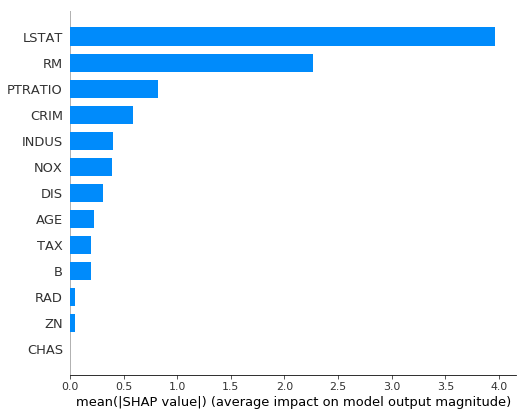

In [38]:
shap.summary_plot(shap_values_XGB_train, X_train, plot_type="bar")

#### Similar to variable importance, this shows the SHAP values for every instance from the training dataset

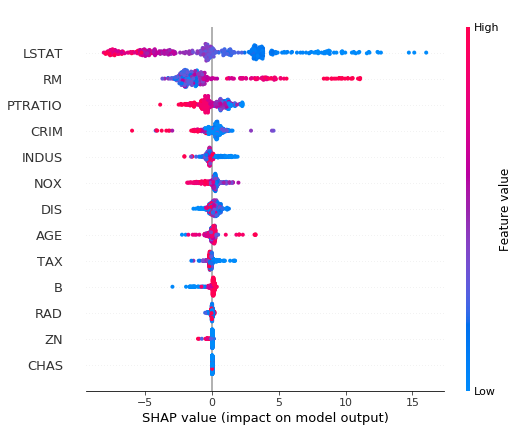

In [39]:
shap.summary_plot(shap_values_XGB_train, X_train)

#### Variable Influence or Dependency Plots

Default SHAP dependency plot

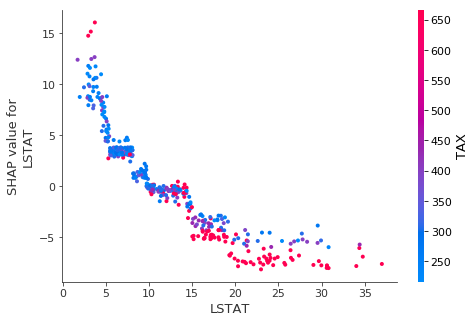

In [40]:
shp_plt = shap.dependence_plot("LSTAT", shap_values_XGB_train, X_train)

The following modifies the default graph a bit to (1) highlight the jth instance with a black dot and (2) pick the color by variable ourselves

In [41]:
# inputs = column of interest as string, column for coloring as string, df of our data, SHAP df, 
#          x postion of the black dot, y position of the black dot

def dep_plt(col, color_by, base_actual_df, base_shap_df, overlay_x, overlay_y):
    cmap=sns.diverging_palette(260, 10, sep=1, as_cmap=True) #seaborn pallete
    f, ax = plt.subplots()
    points = ax.scatter(base_actual_df[col], base_shap_df[col], c=base_actual_df[color_by], s=20, cmap=cmap)
    f.colorbar(points).set_label(color_by)
    ax.scatter(overlay_x, overlay_y, color='black', s=50)
    plt.xlabel(col)
    plt.ylabel("SHAP value for " + col)
    plt.show()

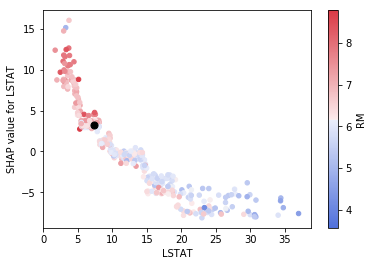

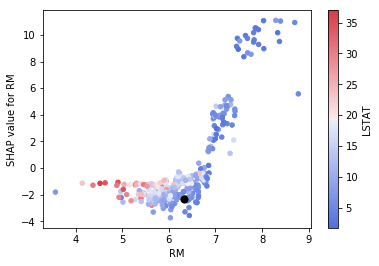

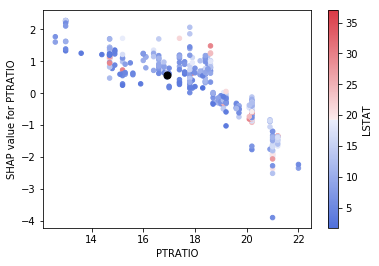

In [42]:
# get list of model inputs in order of SHAP importance
imp_cols = df_shap_XGB_train.abs().mean().sort_values(ascending=False).index.tolist()

# loop through this list to show top 3 dependency plots
for i in range(0, len(imp_cols)):
    #plot the top var and color by the 2nd var
    if i == 0 : 
        dep_plt(imp_cols[i], 
                imp_cols[i+1], 
                X_train, 
                df_shap_XGB_train,
                X_test.iloc[j,:][imp_cols[i]], 
                df_shap_XGB_test.iloc[j,:][imp_cols[i]])
    #plot the 2nd and 3rd vars and color by the top var
    if (i > 0) and (i < 3) : 
        dep_plt(imp_cols[i], 
                imp_cols[0], 
                X_train, 
                df_shap_XGB_train,
                X_test.iloc[j,:][imp_cols[i]], 
                df_shap_XGB_test.iloc[j,:][imp_cols[i]])